In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Apex\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Mock data

In [2]:
np.random.seed(42)
x = np.linspace(0.0, 10.0, 1000000)
y_true = 0.5*x + 5 + np.random.randn(len(x))

In [3]:
df = pd.DataFrame({'x':x, 'y':y_true})

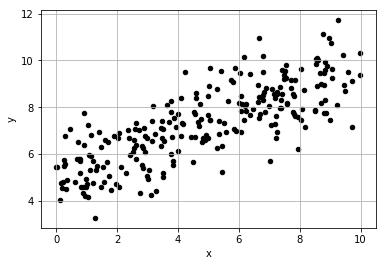

In [4]:
df.sample(n=250).plot(kind='scatter', x='x', y='y', c='k')
plt.gca().grid()

# Building regression graph
### Init ops, variables and placeholders

In [5]:
batch_size = 10 # for feeding in batches
m, b = tf.Variable(1.0), tf.Variable(2.3) # intercept and slope

In [6]:
model_x = tf.placeholder(tf.float32, shape=[batch_size])
model_y = tf.placeholder(tf.float32, shape=[batch_size])

In [7]:
y_model = tf.add(tf.multiply(m, model_x), b)
mse = tf.reduce_mean(tf.square(y_model - model_y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(mse)
init = tf.global_variables_initializer()

### Run session

In [8]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        batch_idx = np.random.randint(len(x), size=batch_size)
        batch_x, batch_y = x[batch_idx], y_true[batch_idx]
        sess.run(train, feed_dict={model_x:batch_x, model_y:batch_y})
        
    final_m, final_b = sess.run([m, b])

In [9]:
y_pred = x * final_m + final_b # fitted line

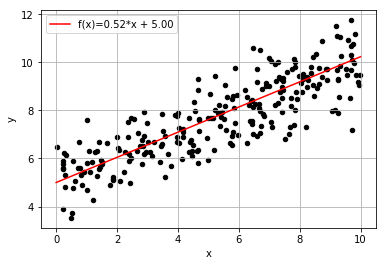

In [10]:
df.sample(n=250).plot(kind='scatter', x='x', y='y', c='k')
plt.plot(x,y_pred,'r', label='f(x)={:.2f}*x + {:.2f}'.format(final_m, final_b))
plt.gca().grid()
plt.gca().legend() 